# Принятие решений (A/B тест)

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Анализ A/B-тестов помогает глубже понять особенности поведения пользователей.
Само тестирование - хороший маркетинговый инструмент для повышения эффективности интернет-ресурса.

Идея A/B тестирования очень проста. Пользователи делятся на сегменты. Один из сегментов остается без изменений — это контрольный сегмент “A”, на основе данных по этому сегменту мы будем оценивать эффект от вносимых изменений. Пользователям из сегмента “B” показываем измененную версию ресурса.

Чтобы получить статистически значимый результат, очень важно исключить влияние сегментов друг на друга, т.е. пользователь должен быть отнесен строго к одному сегменту.

### Часть 1. Приоритизация гипотез

В файле 'hypothesis.csv' 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

##### Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

##### Описание данных:

Файл `/datasets/hypothesis.csv`.
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Часть 2. Анализ A/B-теста

##### Задача

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 
- Остановить тест, зафиксировать победу одной из групп;
- Остановить тест, зафиксировать отсутствие различий между группами;
- Продолжить тест.

##### Описание данных:

Файл `/datasets/orders.csv`.
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`.
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

### 1. Предобработка данных

**Пути к файлам**

- гипотезы: `/datasets/hypothesis.csv`. https://code.s3.yandex.net/datasets/hypothesis.csv
- заказы: `/datasets/orders.csv`. https://code.s3.yandex.net/datasets/orders.csv
- расходы: `/datasets/visitors.csv`. https://code.s3.yandex.net/datasets/visitors.csv

В файле 'hypothesis.csv' 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
#подключим необходимые библиотеки
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats

In [2]:
#открываем файлы
hypothesis = pd.read_csv('C:/Users/nasty/OneDrive/Документы/Яндекс Практикум/Проект Принятие решений (AB)/hypothesis.csv')
orders = pd.read_csv('C:/Users/nasty/OneDrive/Документы/Яндекс Практикум/Проект Принятие решений (AB)/orders.csv')
visitors = pd.read_csv('C:/Users/nasty/OneDrive/Документы/Яндекс Практикум/Проект Принятие решений (AB)/visitors.csv')

Выведем таблицы для предварительного ознакомления.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Узнаем информацию об этих таблицах.

In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Таблица hypothesis готова для анализа.

В таблицах orders и visitors можно обратим внимание на даты. Тип столбца неверный, приведем к нужному формату даты:

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим дубликаты:

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

И пустые значения:

In [15]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

#### Вывод:
Предварительная обработка выполнена:

1) столбцы с датами преобразованы;

2) пустых строк и дубликатов нет.

Дополнительно изучим данные на иной род дубликатов. Проверим, нет ли пользователей, которые попали и в одну, и в другую группу теста. Создадим новую таблицу с группировкой данных по пользователям.

In [17]:
orders_double = orders.groupby(['visitorId']).agg({'group' : 'nunique', 'transactionId' : 'count', 'revenue' : 'sum'}).reset_index()
orders_double.sort_values(by = 'visitorId')

,visitorId,group,transactionId,revenue
0,5114589,1,1,570
1,6958315,1,1,1490
2,8300375,2,2,12300
3,11685486,1,1,6201
4,39475350,1,1,3990
...,...,...,...,...
1026,4266935830,2,2,157980
1027,4278982564,1,1,24744
1028,4279090005,1,1,6716
1029,4281247801,1,1,2640


Найдем количество задвоенных пользователей и всего участвующих уникальных пользователей:

In [18]:
orders_double[orders_double['group'] != 1]["visitorId"].count()

58

Количество пользователей, которые попали в обе группы, равно 58. 

Узнаем, на какую сумму данные пользователи совершили заказы:

In [19]:
orders_double[orders_double['group'] != 1]['revenue'].sum()

1558935

Пользователи, попавшие в обе группы, совершили покупок на 1.5 млн. 

Узнаем, какое количество заказов от пользователей, попавших в обе группы:

In [20]:
orders_double[orders_double['group'] != 1]['transactionId'].sum()

181

Попавшие в обе группы пользователи сделали 181 заказ. 

58 пользователей попали в обе группы.  Всего эти пользователи совершили 181 заказ на более чем 1,5 млн рублей.
Результаты исследования интерпретировать однозначно будет нельзя, так как чтобы получить статистически значимый результат, очень важно исключить влияние сегментов друг на друга, т.е. пользователь должен быть отнесен строго к одному сегменту.

Удалим данных пользователей.

In [21]:
double_list = list(orders_double[orders_double.group != 1]['visitorId'])
orders = orders.query('visitorId not in @double_list')

#### Вывод:
Предобработка выполнена полностью.

### 1. Приоритизация гипотез

In [22]:
pd.set_option('display.max_colwidth', 0)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез.

In [23]:
hypothesis['ICE'] = round((hypothesis['Impact'] + hypothesis['Confidence']) / hypothesis['Efforts'], 2)
hypothesis_sort_ice = hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)
hypothesis_sort_ice

,Hypothesis,ICE
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3.67
8,"Запустить акцию, дающую скидку на товар в день рождения",3.60
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3.33
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",3.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",0.90
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",0.75


Применим фреймворк RICE для приоритизации гипотез.

In [24]:
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)
hypothesis_sort_rice = hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)
hypothesis_sort_rice

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Вывод:
Перспективные гипотезы по ICE - 6, 8, 2, 0, 7.
Приоритизация по RICE изменилась, перспективные гипотезы - 7, 2, 0, 6, 8 - получается такие же, как при ICE, изменился только порядок.
Это связано с тем, что в RICE добавляется такой параметр, как Reach. Этот показатель выше у гипотез, которые были в конце топа ICE  - у 7 гипотезы это 10, у 2 гипотезы - 8. У 8 гипотезы он минимальный - 1. Вследствие этого порядок изменился.

### 2. Анализ A/B-теста

#### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Соберем нужные кумулятивные данные для построения графиков:

In [25]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки в обеих группах:

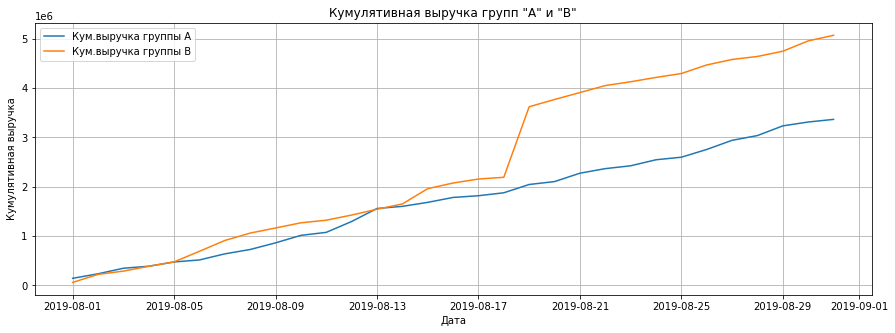

In [26]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.title('Кумулятивная выручка групп "А" и "B"')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend() ;

#### Вывод:
С самого начала видно, что выручка группы "В" растет быстрее, в какой-то момент, 13 августа, данные сошлись. Далее лидерство опять было за группой "В", но лидерство одинаковое, как и в начале теста. Стоит заметить,что переломным моментом стало 19 августа. Сегмент "В" вырвался далеко вперед и лидировал с отрывом до конца теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

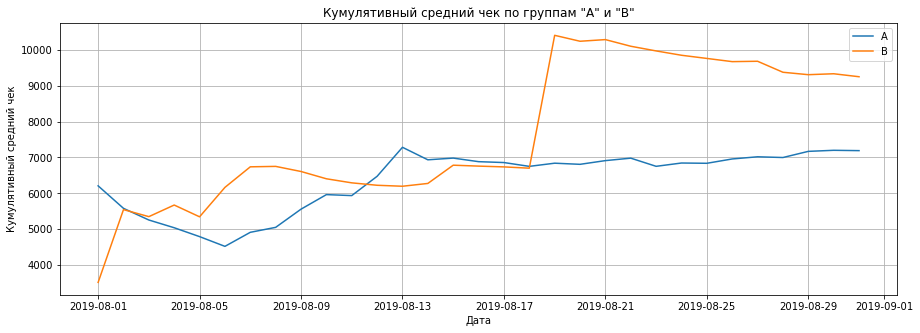

In [27]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.title('Кумулятивный средний чек по группам "А" и "B"')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()

#### Вывод:
График похож на предыдущий, лидирует группа "В". Можно заметить, что пересечение на предыдущем графике выручки отразилось здесь тем, что средний чек группы "А" больше. В остальном, снова полное лидерство сегмента группы "В". И также виден большой средний чек группы "В" 19 августа.

#### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

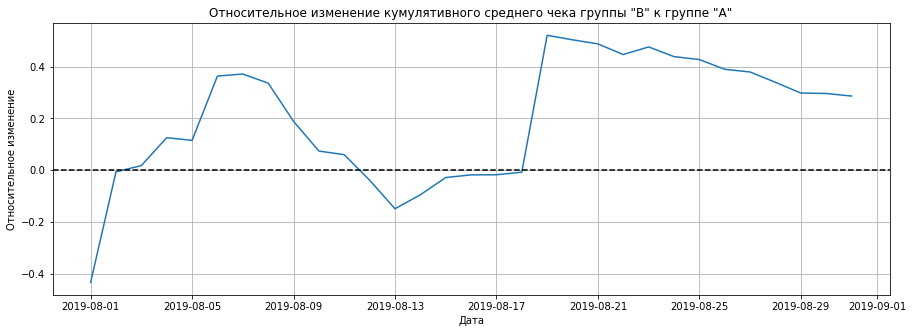

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы "В" к группе "А"')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid()

#### Вывод:
Данный график подтвержает предыдущие, выводы по большей части одинаковые. Средний чек группы "А" был больше только 1 август и с 12 по 14 августа. С 1 августа средний чек группы "В" начал расти над группой "А", и так до примерно 8 августа, где группа начала нисходящий тренд. После перелома группы "А" над группой "В", группа "В" снова начала расти примерно с 15 августа, а 19 августа показала сильный рост с аномально большим чеком, затем группа "В" была примерно на том же уровне, но с постепенным небольшим понижением относительно всплеска.

#### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Построим и проанализируем график кумулятивной конверсии:

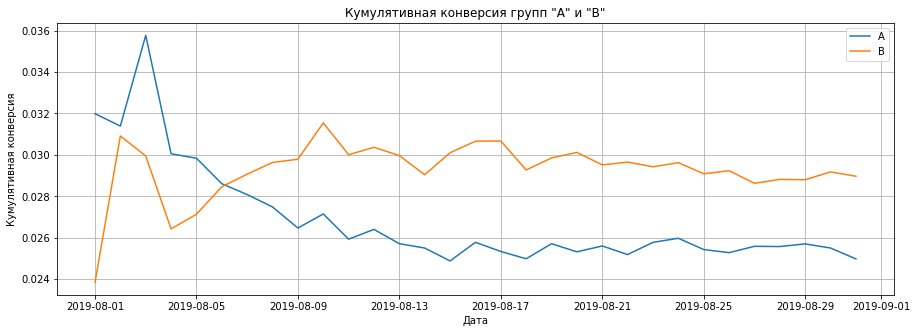

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия групп "А" и "B"')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.legend()
plt.grid()
#plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.04])

#### Вывод:
По графику можно сказать о том, что изначально у группы "А" была очень хорошая конверсия. Было пиковое значение 3 августа. Затем показатели конверсии группы "А" резко упали, и до конца исследования оставались в очень низком стагнирующем положении. Переломный момент, когда лидерство перешло к группе "В" стало 6 августа. С этого момента группа в разы превышала группу "А" по конверсии. Стоит также посмотреть на даты с плохими показателями для группы В из прошлых графиков - это 12 - 14 августа. В эти дни у группы "В" действительно были соответствующие пробелы в показателях конверсии после пика. Но каких-то феноменальных всплесков на 19 августа, как в прошлых исследованиях, нет. Значит в тот день дело не в конверсии, а как предполагалось ранее в объеме или стоимости покупки.

#### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия кумулятивных конверсий:

Text(0, 0.5, 'Относительное изменение')

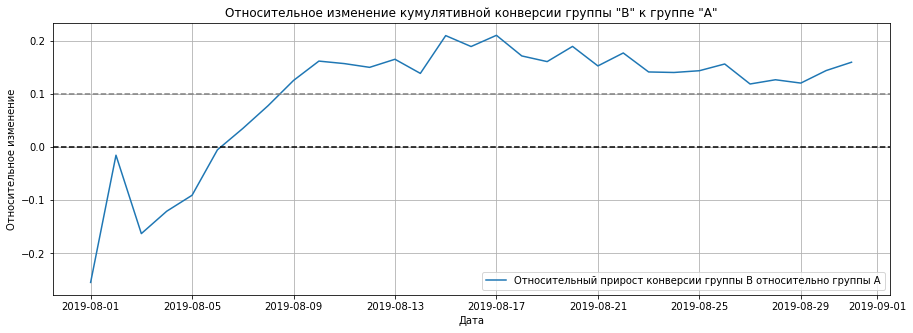

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы "В" к группе "А"')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
#plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.2])

#### Вывод:
В целом, опять таки, так как это является следствием предыдущего пункта, выводы могут быть одинаковыми.
Конверсия группы В росла с начала, с 1 по 2 августа, только 2 августа превосходила конверсию группы А на 5%. Затем была на минимальном своем положении в тот момент, когда у группы А был наивысший показатель конверсии - 3 августа. С 5 августа начинает восходящий тренд группы В над группой А, и переломный момент 6 августа полностью меняет картину в сторону группы В, и такой восходящий тренд в относительном изменении продлевается до 10 августа. С этого числа группа В превосходит группу А примерно на одном и том же уровне, максимально достигая 21% разницы. После 19 августа показатели ухудшаются, но остаются в превосходстве группы В на 10%.

#### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Подсчитаем количество заказов по пользователям:

In [31]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitorId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


Максимальное количество заказов у некоторых пользователей - 3.

Построим точечную диаграмму числа заказов на одного пользователя:

Text(0, 0.5, 'Количество заказов')

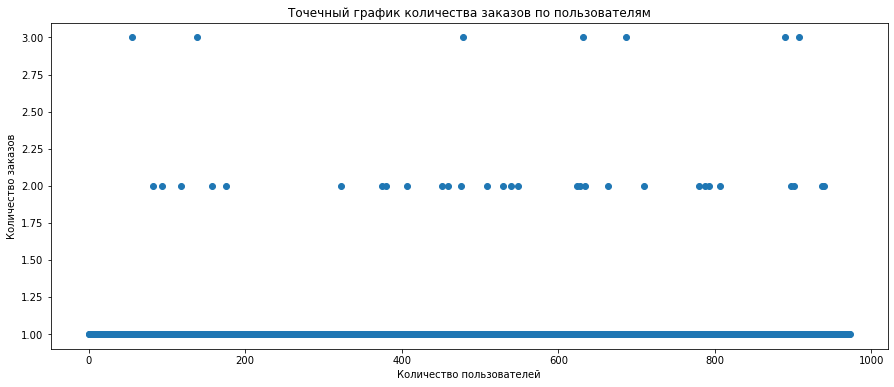

In [32]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.gcf().set_size_inches((15, 6))
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

#### Вывод:
Больше всего пользователей сделали 1 заказ. Далее идут те, кто сделал 2 заказа - их не так много, но показатели существенные.
3 и более заказа сделали очень малое число пользователей. Нужно уточнить аномалии ли это с помощью подсчета процентилей (95 и 99).

#### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


#### Вывод:
Не более 5% пользователей оформляли больше 1 заказа, и не более 1% - больше 2 заказов. Всё, что выше 2 - аномалии. 

#### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Подстроим график по стоимости заказов:

Text(0, 0.5, 'Стоимость заказа')

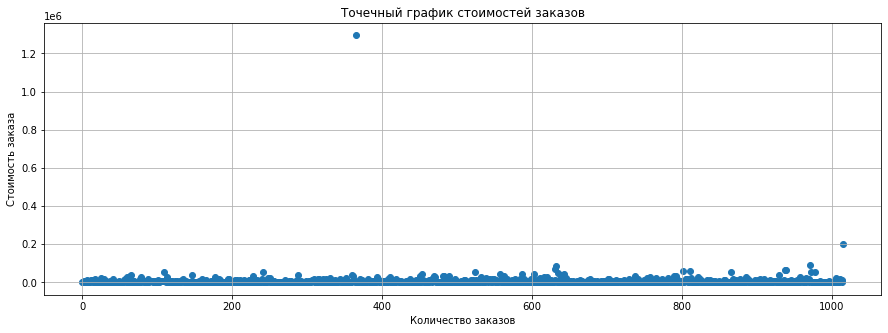

In [34]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')

На графике видна аномальная точка. Проверим данные, отсортируя по выручке:

In [35]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Заказ с номером 425 сильно отличается от остальных в разы. Дата заказа как раз 19 августа, а группа исследования - "В".

Остальные данные на примерно одном уровне. Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 199000:

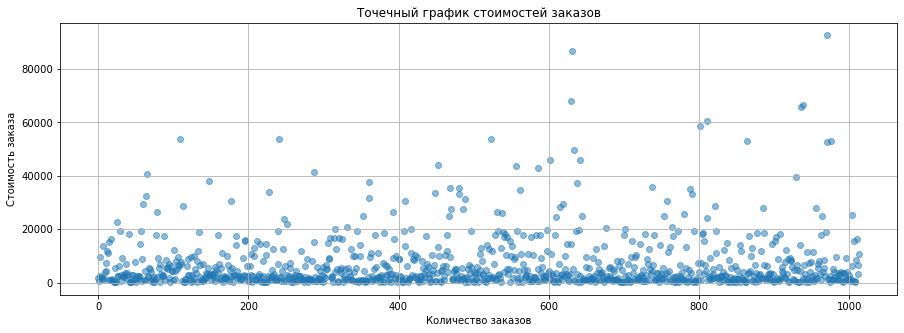

In [36]:
order_anomal = orders[orders['revenue']<=199000]['revenue']
xn_values = pd.Series(range(0,len(order_anomal)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.scatter(xn_values, order_anomal, alpha=0.5);

#### Вывод:
На графике хорошо был выделен самый аномальный заказ с номером 475 на сумму 1.29 млн, совершенный как раз в дату всплеска показателей группы "В" - 19 августа. Второй не настолько аномальный, но все-таки ярковыраженный на фоне остальных заказ на 200 тыс. Все остальные заказы находятся на уровне 100 тыс. Далее проверим аномальность по процентилям.

#### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [37]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


#### Вывод:
99% заказов меньше суммы 53904, и только 1% заказов больше этой суммы. Сделаем это значение границей аномалии.

#### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость без удаления аномальным пользователей.

In [38]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

**Нулевая гипотеза H0** - статистически значимых различий в конверсии между группами нет.

**Гипотеза H1** - статистически значимые различия есть.

Уровень статистической значимости - p-value - 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [39]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

alpha = 0.05
p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160


#### Вывод:
p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. 

По «сырым» данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 16% .

#### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза H0** - статистически значимых различий в среднем чеке между группами нет.
 
**Гипотеза H1** - статистически значимые различия есть.
 
Уровень статистической значимости - p-value - 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам.

Посчитаем статистическую значимость различий в среднем чеке между сегментами:

In [40]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.829
Относительный показатель 'B' и 'A' = 0.287


#### Вывод:
p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Средний чек по "сырым" данным группы "B" значительно выше среднего чека группы "A" - на 28.7%. Но данное превышение не является значимым, получено случайно, предположительно, из-за самого большого чека 425 от 19 августа.

#### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Напомним, что найденные ранее 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904. 
Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 53 904. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53 904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
dtype: int64


Узнаем, как их действия повлияли на результаты теста. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

**Нулевая гипотеза H0** - статистически значимых различий в конверсии между группами нет.

**Гипотеза H1** - статистически значимые различия есть.

Уровень статистической значимости - p-value - 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [43]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.008
Относительный показатель 'B' и 'A' = 0.188


#### Вывод:
p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. 
По «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 18.8%. Этот показатель выше, чем с «сырыми» данными - 16%.

#### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Нулевая гипотеза H0** - статистически значимых различий в среднем чеке между группами нет.
 
**Гипотеза H1** - статистически значимые различия есть.
 
Уровень статистической значимости - p-value - 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [44]:
print("alpha =",0.05)
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

alpha = 0.05
p-value = 0.969
Относительный показатель 'B' и 'A' = 0.002


#### Вывод:
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет, как и с "сырыми" данными. Чего не скажешь о среднем чеке группы "B", который оказался незначительно выше (на 0.2%) среднего чека группы "A"
В это же время, по "сырым" данным, он был больше на 28.7%, - и всё это из-за одного того самого аномального заказа 425 на 1,29 млн.

#### 14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп;
- Остановить тест, зафиксировать отсутствие различий между группами;
- Продолжить тест.

#### Вывод:
Как по "сырым", так и по "очищенным" данным есть различия в конверсии групп "А" и "В". Относительное превосходство группы "В" над группой "А" составляет 16% по "сырым" данным и 18.8% по "очищенным" данным соответственно.

Также, по "сырым" и по "очищенным" данным отсутствуют различия в средних чеках для групп "А" и "B".
При этом средний чек группы "B" по "очищенным" данным оказался на 0.2% выше среднего чека группы "A". 
По "сырым" данным, он был больше 28.7%, - и всё это из-за одного того самого аномального заказа 425 на 1,29 млн.
Логично, что когда аномальный заказ убрали, чеки сравнялись.

Результаты тестирования вполне однозначны. Мы можем принять решение остановить тестирование и зафиксировать победу группы "B": она значительно эффективнее группы "A" по конверсии, хотя по среднему чеку группы примерно равна.